# Aprendizaje Profundo - Clase 3


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

**Consejo, montar drive para utilizar datos desde colab**

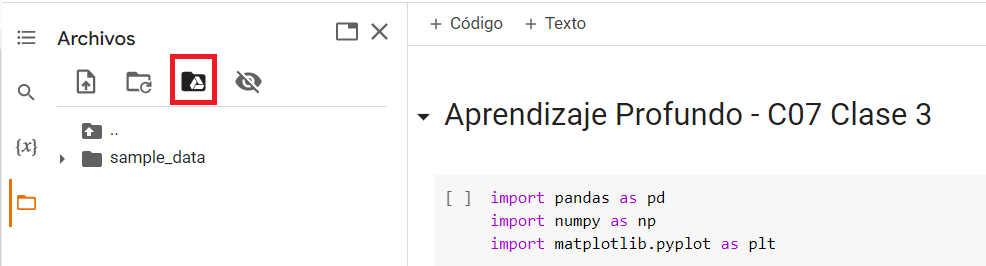

## Cargamos el dataset

In [2]:
df = pd.read_csv("/content/drive/MyDrive/Trabajo AP/class_7_wine_dataset_v2.csv")

In [3]:
len(df)

6497

## Exploramos el dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            6497 non-null   int64  
 1   type                  6497 non-null   object 
 2   fixed acidity         6487 non-null   float64
 3   volatile acidity      6489 non-null   float64
 4   citric acid           6494 non-null   float64
 5   residual sugar        6495 non-null   float64
 6   chlorides             6495 non-null   float64
 7   free sulfur dioxide   6497 non-null   float64
 8   total sulfur dioxide  6497 non-null   float64
 9   density               6497 non-null   float64
 10  pH                    6488 non-null   float64
 11  sulphates             6493 non-null   float64
 12  alcohol               6497 non-null   float64
 13  quality               6497 non-null   int64  
 14  vendor_id             6497 non-null   int64  
dtypes: float64(11), int64

In [5]:
df.head()

,Unnamed: 0,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,vendor_id
0,0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,369
1,1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,361
2,2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,354
3,3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,325
4,4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,375


In [6]:
df['type'].unique()

array(['white', 'red'], dtype=object)

In [7]:
# Type es tipo categórica, transformamos con One Hot Encoding
type_dummies = pd.get_dummies(df['type'], prefix="type")
type_dummies

,type_red,type_white
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
6492,1,0
6493,1,0
6494,1,0
6495,1,0


In [8]:
df = pd.concat([df,type_dummies], axis = 1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            6497 non-null   int64  
 1   type                  6497 non-null   object 
 2   fixed acidity         6487 non-null   float64
 3   volatile acidity      6489 non-null   float64
 4   citric acid           6494 non-null   float64
 5   residual sugar        6495 non-null   float64
 6   chlorides             6495 non-null   float64
 7   free sulfur dioxide   6497 non-null   float64
 8   total sulfur dioxide  6497 non-null   float64
 9   density               6497 non-null   float64
 10  pH                    6488 non-null   float64
 11  sulphates             6493 non-null   float64
 12  alcohol               6497 non-null   float64
 13  quality               6497 non-null   int64  
 14  vendor_id             6497 non-null   int64  
 15  type_red             

In [9]:
# Exploramos vendor_id
len(df['vendor_id'].unique())

500

vendor_id es tipo categórica con gran cantidad de valores diferentes, no podemos aplicar One Hot Encoding. Por el momento se descarta, en un futuro utilizaremos capas de embeddings con esta variable.

In [10]:
# Mi variable a predecir es quality, la calidad del vino.
df['quality'].unique()

array([6, 5, 7, 8, 4, 3, 9])

(array([  30.,  216.,    0., 2138.,    0., 2836., 1079.,    0.,  193.,
           5.]),
 array([3. , 3.6, 4.2, 4.8, 5.4, 6. , 6.6, 7.2, 7.8, 8.4, 9. ]),
 <a list of 10 Patch objects>)

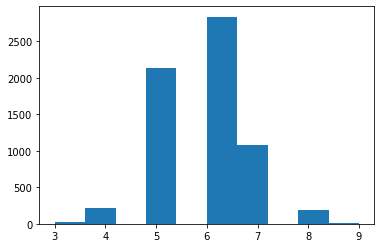

In [11]:
quality = df['quality'].to_numpy()
fig, ax1 = plt.subplots(1,1)
ax1.hist(quality)

Por simplicidad convertimos el problema en un problema de clasificación binaria: 0 si el vino es "malo", 1 si el vino es "bueno"

In [12]:
df["quality_label"] = df["quality"].apply(lambda q:0 if q<=6 else 1)

In [13]:
df.sample(7)

,Unnamed: 0,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,vendor_id,type_red,type_white,quality_label
3952,3952,white,7.0,0.16,0.30,2.6,0.043,34.0,90.0,0.99047,2.88,0.47,11.2,6,326,0,1,0
3678,3678,white,7.2,0.23,0.25,18.8,0.085,19.0,111.0,1.00044,3.10,0.51,8.7,5,208,0,1,0
859,859,white,6.6,0.30,0.30,4.8,0.170,60.0,166.0,0.99460,3.18,0.47,9.4,5,232,0,1,0
189,189,white,6.5,0.28,0.28,8.5,0.047,54.0,210.0,0.99620,3.09,0.54,8.9,4,180,0,1,0
3182,3182,white,5.5,0.12,0.33,1.0,0.038,23.0,131.0,0.99164,3.25,0.45,9.8,5,292,0,1,0
5229,5229,red,10.2,0.36,0.64,2.9,0.122,10.0,41.0,0.99800,3.23,0.66,12.5,6,303,1,0,0
4148,4148,white,6.2,0.20,0.25,15.0,0.055,8.0,120.0,0.99767,3.19,0.53,9.6,6,308,0,1,0


In [14]:
# Comprobamos la existencia de nan
df.isna().sum(axis=0)

Unnamed: 0               0
type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
vendor_id                0
type_red                 0
type_white               0
quality_label            0
dtype: int64

In [15]:
# Como tenemos pocos nan, borramos las filas donde hay nan y trabajamos con un dataset completo
ds = df[df.isna().sum(axis = 1) == 0]

In [16]:
ds.isna().sum()

Unnamed: 0              0
type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
vendor_id               0
type_red                0
type_white              0
quality_label           0
dtype: int64

## Armado del dataset

In [17]:
# Guardo vendor_id para un futuro modelo con embeddings
vendor_id = ds['vendor_id']
# Recordar que debo borrar del dataset de entrada mi columna de salida!
x = ds.drop(['Unnamed: 0','type','vendor_id','quality','quality_label'], axis=1) 
y = ds['quality_label']

In [18]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6463 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6463 non-null   float64
 1   volatile acidity      6463 non-null   float64
 2   citric acid           6463 non-null   float64
 3   residual sugar        6463 non-null   float64
 4   chlorides             6463 non-null   float64
 5   free sulfur dioxide   6463 non-null   float64
 6   total sulfur dioxide  6463 non-null   float64
 7   density               6463 non-null   float64
 8   pH                    6463 non-null   float64
 9   sulphates             6463 non-null   float64
 10  alcohol               6463 non-null   float64
 11  type_red              6463 non-null   uint8  
 12  type_white            6463 non-null   uint8  
dtypes: float64(11), uint8(2)
memory usage: 618.5 KB


In [19]:
y

0       0
1       0
2       0
3       0
4       0
       ..
6491    0
6492    0
6494    0
6495    0
6496    0
Name: quality_label, Length: 6463, dtype: int64

## Normalizacion

Las redes neuronales no requieren que los datos esten normalizados, pero la normalización ayuda a que el algoritmo de gradient descent converga más rápido.

In [20]:
x = x.to_numpy()
y = y.to_numpy()

In [21]:
x

array([[ 7.   ,  0.27 ,  0.36 , ...,  8.8  ,  0.   ,  1.   ],
       [ 6.3  ,  0.3  ,  0.34 , ...,  9.5  ,  0.   ,  1.   ],
       [ 8.1  ,  0.28 ,  0.4  , ..., 10.1  ,  0.   ,  1.   ],
       ...,
       [ 6.3  ,  0.51 ,  0.13 , ..., 11.   ,  1.   ,  0.   ],
       [ 5.9  ,  0.645,  0.12 , ..., 10.2  ,  1.   ,  0.   ],
       [ 6.   ,  0.31 ,  0.47 , ..., 11.   ,  1.   ,  0.   ]])

In [22]:
np.min(x, axis=0)

array([3.8    , 0.08   , 0.     , 0.6    , 0.009  , 1.     , 6.     ,
       0.98711, 2.72   , 0.22   , 8.     , 0.     , 0.     ])

In [23]:
# Normalización min max
x_norm = (x - np.min(x, axis=0)) / (np.max(x, axis=0 ) - np.min(x, axis=0))

In [24]:
print(np.min(x_norm, axis=0))
print(np.max(x_norm, axis=0))

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


## División del dataset
Divido en entrenamiento y validación

In [25]:
idx = np.random.permutation(x_norm.shape[0])
idx

array([5884,  405, 5556, ..., 5788, 5800, 6167])

In [26]:
train_idx = idx[0:int(0.85*len(idx))]
valid_idx = idx[int(0.85*len(idx)):]
print(train_idx.shape)
print(valid_idx.shape)

(5493,)
(970,)


In [27]:
train_x = x_norm[train_idx]
train_y = y[train_idx]
valid_x = x_norm[valid_idx]
valid_y = y[valid_idx]

n_train = train_x.shape[0]
n_valid = valid_x.shape[0]

## Pytorch

In [28]:
import torch
from torch.utils.data import Dataset, DataLoader
from sklearn import metrics

In [29]:
# Pytorch necesita de una clase de dataset que extienda de torch.utils.data.Dataset
# Esta clase dataset debe sobreescribir los métodos init, len y getitem
class MyDataset(Dataset):

  #__init__ guarda el dataset en una variable de clase
  def __init__(self, x, y):
    self.x = x
    self.y = y

  # __len__ define el comportamiento de la función len() sobre el objeto
  def __len__(self):
    return self.x.shape[0]

  # __getitem__ define el comportamiento de los []
  def __getitem__(self, idx):
    return self.x[idx], self.y[idx]

In [30]:
# Creo el dataset de entrenamiento
train_ds = MyDataset(train_x, train_y)

In [31]:
# Testeo funcionamiento de __getitem__
train_ds[20]

(array([0.17355372, 0.23666667, 0.09638554, 0.08895706, 0.03654485,
        0.06944444, 0.29493088, 0.08482745, 0.40310078, 0.13483146,
        0.60869565, 0.        , 1.        ]), 0)

In [32]:
# Creo el dataset de validación
valid_ds = MyDataset(valid_x, valid_y)

In [33]:
# Testeo funcionamiento de __len__
len(valid_ds)

970

In [34]:
# Pytorch utiliza DataLoader para entregar los dataset de a batches
train_dataloader = DataLoader(train_ds, batch_size = 64, shuffle= True)
valid_dataloader = DataLoader(valid_ds, batch_size=64)

In [35]:
# Test dataloader
batch_1 = next(iter(train_dataloader))
batch_1[1].shape

torch.Size([64])

In [36]:
print(type(batch_1[0]))

<class 'torch.Tensor'>


### Tensores
Los objetos torch.Tensor son vectores muy parecidos a los vectores de numpy pero pueden ejecutar funciones en GPU (numpy solo corre en CPU) y pueden guardar información del grafo de cómputos para realizar luego el backpropagation

In [37]:
# Defino 2 tensores con seguimiento del grafo de cómputos
w = torch.tensor([1.0], requires_grad=True)
q = torch.tensor([5.0], requires_grad=True)
print(w)
print(q)

tensor([1.], requires_grad=True)
tensor([5.], requires_grad=True)


In [38]:
# Defino z y p como cálculos sobre w y q
z = w * q 
p = z**2

In [39]:
# z y p almacenen información de como fueron cálculados para facilitar el backpropagation
print(z)
print(p)

tensor([5.], grad_fn=<MulBackward0>)
tensor([25.], grad_fn=<PowBackward0>)


In [40]:
# Ejecutamos el cálculo del backpropagation
p.backward()

In [41]:
# w y q poseen en grad el cálculo del dp/dw y dp/dz respectivamente
print(w.grad)
print(q.grad)

tensor([50.])
tensor([10.])


### Arquitectura NNet Pytorch
La red neuronal en Pytorch se define extendiendo torch.nn.Module

In [42]:
class NNet(torch.nn.Module):

  def __init__(self):
    # Defino la arquitectura de la red
    super().__init__()
    self.linear_1 = torch.nn.Linear(in_features=13, out_features=200, bias=True)
    self.relu_1 = torch.nn.ReLU()
    self.linear_2 = torch.nn.Linear(in_features = 200, out_features=100, bias=True)
    self.relu_2 = torch.nn.ReLU()
    self.output = torch.nn.Linear(in_features = 100, out_features= 1, bias=True)

  def forward(self, x):
    # Defino el cálculo del paso forward
    x = self.linear_1(x)
    x = self.relu_1(x)
    x = self.linear_2(x)
    x = self.relu_2(x)
    x = self.output(x)
    return x

In [43]:
# Instanciamos la red
nnet = NNet()

In [44]:
print(nnet)

NNet(
  (linear_1): Linear(in_features=13, out_features=200, bias=True)
  (relu_1): ReLU()
  (linear_2): Linear(in_features=200, out_features=100, bias=True)
  (relu_2): ReLU()
  (output): Linear(in_features=100, out_features=1, bias=True)
)


In [45]:
# Imprimimos los parámetros optimizables de la red
print([p for p in nnet.parameters()])

[Parameter containing:
tensor([[ 0.1896,  0.1583,  0.0041,  ..., -0.1601,  0.1996, -0.0217],
        [ 0.2530, -0.0420,  0.0492,  ..., -0.2264, -0.2078,  0.1821],
        [ 0.1809,  0.0487, -0.2173,  ...,  0.0866,  0.0461, -0.0011],
        ...,
        [-0.1602,  0.0437, -0.0569,  ...,  0.0164,  0.1584,  0.1844],
        [-0.1635, -0.2118,  0.0296,  ..., -0.1963, -0.0106,  0.1936],
        [-0.2279, -0.0059, -0.1513,  ..., -0.1411,  0.1050,  0.1379]],
       requires_grad=True), Parameter containing:
tensor([ 0.2530, -0.2613,  0.0945,  0.2165, -0.1833, -0.0903, -0.1350, -0.0996,
         0.2623, -0.2207, -0.0649,  0.1594,  0.1566,  0.1588,  0.0787, -0.2267,
        -0.1646, -0.1894, -0.1136, -0.0121, -0.1304, -0.0592, -0.1330,  0.0070,
         0.0682,  0.1506, -0.1436,  0.1322, -0.1771,  0.1771,  0.1749, -0.0089,
        -0.1078,  0.0609,  0.0110, -0.0656,  0.2594, -0.0937,  0.0523,  0.0753,
         0.1967,  0.2412,  0.2519,  0.0022,  0.0246,  0.2104,  0.2088, -0.2626,
         0.09

In [46]:
# Imprimo la cantidad de parámetros optimizables de la red
print(sum(p.numel() for p in nnet.parameters()))

23001


### Loss y optimizador
- Como loss function utilizo BCE por ser un problema de clasificación binaria.

**Nota**: la función sigmoid de salida no se definió en la arquitectura de la red neuronal porque utilizo BCEWithLogitsLoss que combina sigmoid+BCE. Hago esto para tener mejor estabilidad numérica: [link](https://pytorch.org/docs/stable/generated/torch.nn.BCEWithLogitsLoss.html).

Podría utilizar BCELoss y agregar la capa sigmoid en la clase NNet

- Como optimizador utilizo Adam

In [47]:
loss_function = torch.nn.BCEWithLogitsLoss(reduction='sum')
optimizer = torch.optim.Adam(nnet.parameters(), lr=0.01)

Pytorch puede correr en GPU. Con el siguiente código chequeo si hay una GPU compatible disponible y la utilizo en ese caso.

**Como utilizar GPU con colab**: Ir a Entorno de ejecucion -> Cambiar tipo de entorno de ejecución. Seleccionar GPU

In [48]:
device = "cpu"
if torch.cuda.is_available():
  device = "cuda:0"

device

'cuda:0'

In [49]:
# Copio la red neuronal al dispositivo donde entrene la red neuronal
nnet = nnet.to(device)

### Entrenamiento y validación red neuronal

Entreno con algoritmo Mini-Batch

In [50]:
# cantidad de epochs
epochs = 100

train_loss_by_epoch=[]
valid_loss_by_epoch=[]

# Doble loop algoritmo Mini-Batch
for epoch in range(epochs):
  
  ############################################
  ## Entrenamiento
  ############################################
  nnet.train(True)

  epoch_loss = 0
  epoch_y_hat = []
  epoch_y = []
  
  for i,data in enumerate(train_dataloader):
    # Obtengo los datos del batch de entrenamiento
    x_batch, y_batch = data
    # Copio el batch al dispositivo donde entreno la red neuronal
    x_batch = x_batch.to(device).float()
    y_batch = y_batch.to(device).float().reshape(-1, 1)

    # Paso forward
    # Limpio optimizer para empezar un nuevo cálculo de gradiente
    optimizer.zero_grad()
    nnet_output = nnet(x_batch)
    y_batch_hat = torch.sigmoid(nnet_output)
    
    # Calculo el loss
    loss = loss_function(nnet_output, y_batch)

    # Backpropagation
    loss.backward()

    # Actualizar los parámetros
    optimizer.step()

    # Almaceno los valores reales y mis predicciones para cálcular las métricas
    epoch_y += list(y_batch.detach().cpu().numpy())
    epoch_y_hat += list(y_batch_hat.detach().cpu().numpy())
    # Acumulo la loss del batch
    epoch_loss = epoch_loss + loss.item()

  # Calculo la media de la loss
  epoch_loss = epoch_loss / n_train
  # Almaceno la loss de la epoch para graficar
  train_loss_by_epoch.append(epoch_loss)
  # Cálculo la métrica de la epoch
  accuracy = metrics.accuracy_score(epoch_y, [j>=0.5 for j in epoch_y_hat])

  ############################################
  ## Validación
  ############################################
  # Desactivo el cálculo de gradiente para validación
  nnet.train(False)

  valid_epoch_loss = 0
  valid_epoch_y_hat = []
  valid_epoch_y = []

  for i,data in enumerate(valid_dataloader):
    # Obtengo los datos del batch de validación
    x_batch, y_batch = data
    # Copio el batch al dispositivo donde entreno la red neuronal
    x_batch = x_batch.to(device).float()
    y_batch = y_batch.to(device).float().reshape(-1, 1)

    # Paso forward
    nnet_output = nnet(x_batch)
    y_batch_hat = torch.sigmoid(nnet_output)
    
    # Calculo el loss
    loss = loss_function(nnet_output, y_batch)

    # En validación no hago backpropagation!!

    # Almaceno los valores reales y mis predicciones para cálcular las métricas
    valid_epoch_y += list(y_batch.detach().cpu().numpy())
    valid_epoch_y_hat += list(y_batch_hat.detach().cpu().numpy())
    # Acumulo la loss del batch
    valid_epoch_loss = valid_epoch_loss + loss.item()

  # Calculo la media de la loss
  valid_epoch_loss = valid_epoch_loss / n_valid
  # Almaceno la loss de la epoch para graficar
  valid_loss_by_epoch.append(valid_epoch_loss)
  # Cálculo la métrica de la epoch
  valid_accuracy = metrics.accuracy_score(valid_epoch_y, [j>=0.5 for j in valid_epoch_y_hat])

  ############################################
  ## Impresión de resultados por epoch
  ############################################
  print(f" Epoch {epoch} | " \
        f"Train/Valid loss: {epoch_loss:.3f} / {valid_epoch_loss:.3f} | " \
        f"Train/Valid accuracy: {accuracy:.3f} / {valid_accuracy:.3f}")

 Epoch 0 | Train/Valid loss: 0.430 / 0.416 | Train/Valid accuracy: 0.803 / 0.823
 Epoch 1 | Train/Valid loss: 0.402 / 0.419 | Train/Valid accuracy: 0.815 / 0.809
 Epoch 2 | Train/Valid loss: 0.396 / 0.426 | Train/Valid accuracy: 0.816 / 0.811
 Epoch 3 | Train/Valid loss: 0.396 / 0.403 | Train/Valid accuracy: 0.818 / 0.816
 Epoch 4 | Train/Valid loss: 0.383 / 0.403 | Train/Valid accuracy: 0.817 / 0.821
 Epoch 5 | Train/Valid loss: 0.386 / 0.395 | Train/Valid accuracy: 0.820 / 0.806
 Epoch 6 | Train/Valid loss: 0.377 / 0.385 | Train/Valid accuracy: 0.823 / 0.819
 Epoch 7 | Train/Valid loss: 0.374 / 0.394 | Train/Valid accuracy: 0.823 / 0.818
 Epoch 8 | Train/Valid loss: 0.374 / 0.391 | Train/Valid accuracy: 0.827 / 0.825
 Epoch 9 | Train/Valid loss: 0.371 / 0.375 | Train/Valid accuracy: 0.821 / 0.828
 Epoch 10 | Train/Valid loss: 0.365 / 0.387 | Train/Valid accuracy: 0.828 / 0.814
 Epoch 11 | Train/Valid loss: 0.372 / 0.393 | Train/Valid accuracy: 0.825 / 0.820
 Epoch 12 | Train/Valid lo

Text(0, 0.5, 'BCE')

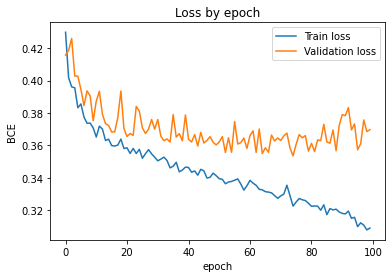

In [52]:
fig, ax1= plt.subplots(1,1)
ax1.plot(train_loss_by_epoch, label="Train loss")
ax1.plot(valid_loss_by_epoch, label="Validation loss")
ax1.legend()
ax1.set_title("Loss by epoch")
ax1.set_xlabel("epoch")
ax1.set_ylabel("BCE")